In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')
# train.info()

In [105]:
#Right off the bat we can see that PassengerId and Name will not have any value and Cabin is missing too many values, Ticket is too hard to ....
train = train.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
test = test.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
# train

In [106]:
# train.info()
# train['Pclass'].unique()

In [107]:
train = pd.get_dummies(train, drop_first = True, columns = ['Sex','Embarked','Pclass'])
test = pd.get_dummies(test, drop_first = True, columns = ['Sex','Embarked','Pclass'])

In [108]:
# train.head()

In [109]:
#Now that we have all numeric values, we can plot the correlation coefficient
correlation = train.corr(method='pearson')
# sns.heatmap(correlation,annot=True)
# plt.show()
# Pearson model says that .3-.49 indicates moderate correlation and .50-1 indicates strong correlation

In [110]:
# plt.hist(train['Age'])
# plt.show()

In [111]:
# plt.hist(train['Fare'],bins=40)
# plt.show()

In [112]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train['Age'] = imp.fit_transform(train['Age'].values.reshape(-1,1))
test['Age'] = imp.fit_transform(test['Age'].values.reshape(-1,1))
test['Fare'] = imp.fit_transform(test['Fare'].values.reshape(-1,1))

In [113]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    

In [124]:
from sklearn.preprocessing import normalize
norm = normalize()
train = norm(train)

TypeError: normalize() missing 1 required positional argument: 'X'

In [117]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# train['Age'] = scaler.fit_transform(train['Age'].values.reshape(-1,1))
# train['Fare'] = scaler.fit_transform(train['Age'].values.reshape(-1,1))

ValueError: cannot reshape array of size 891 into shape (0,1)

In [116]:
train

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,-0.592240,1,0,7.2500,1,0,1,0,1
1,1,0.638529,1,0,71.2833,0,0,0,0,0
2,1,-0.284548,0,0,7.9250,0,0,1,0,1
3,1,0.407760,1,0,53.1000,0,0,1,0,0
4,0,0.407760,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.207624,0,0,13.0000,1,0,1,1,0
887,1,-0.823009,0,0,30.0000,0,0,1,0,0
888,0,0.000000,1,2,23.4500,0,0,1,0,1
889,1,-0.284548,0,0,30.0000,1,0,0,0,0


In [3]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train['Pclass'] = scaler.fit_transform(X_train['Pclass'].values.reshape(-1,1))[:,0]
# X_train['Age'] = scaler.fit_transform(X_train['Age'].values.reshape(-1,1))[:,0]
# X_train['Fare'] = scaler.fit_transform(X_train['Fare'].values.reshape(-1,1))[:,0]
# X_test['Pclass'] = scaler.fit_transform(X_test['Pclass'].values.reshape(-1,1))[:,0]
# X_test['Age'] = scaler.fit_transform(X_test['Age'].values.reshape(-1,1))[:,0]
# X_test['Fare'] = scaler.fit_transform(X_test['Fare'].values.reshape(-1,1))[:,0]

NameError: name 'X_train' is not defined

In [60]:
# labels = ['Pclass','Age','SibSp','Parch','Fare','Embarked']
# male = train.loc[train['Sex'] == 'male']
# male_survived_1 = male.loc[male['Survived'] == 1]
# male_survived_0 = male.loc[male['Survived'] == 0]
# female = train.loc[train['Sex'] == 'female']
# female_survived_1 = female.loc[female['Survived'] == 1]
# female_survived_0 = female.loc[female['Survived'] == 0]
# male_x_values = [male['Pclass'],male['Age'],male['SibSp'],male['Parch'],male['Fare'],male['Embarked']]

# x = np.arange(len(labels))
# fig, ax = plt.subplots(sharex=True,sharey=True)
# ax.bar(x=male_x_values,y=male_survived_1)
# plt.show()



In [62]:


# # imp.transform(train['Age'].reshape(-1,1))
# train = train.drop('Name',axis=1)
# test = test.drop('Name',axis=1)

# imp.fit_transform(train)
# train=pd.get_dummies(train,drop_first=True,columns=['Sex','Embarked'])
# test=pd.get_dummies(test,drop_first=True,columns=['Sex', 'Embarked'])
# X_train=train.drop(['Survived','Ticket','Cabin'],axis=1)
# X_test=test.drop(['Ticket','Cabin'],axis=1)
# y_train=train['Survived']

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'male'

In [55]:
# X_train.isna().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [31]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# model = LogisticRegression()
# # solvers = ['newton-cg', 'lbfgs', 
# solvers = ['liblinear','sag', 'saga']
# penalty = ['l1','l2','elasticnet']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # solution = pd.DataFrame(X_test['PassengerId'])
# # solution['Survived'] = predictions
# # solution.to_csv('submission_1_et.csv',index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

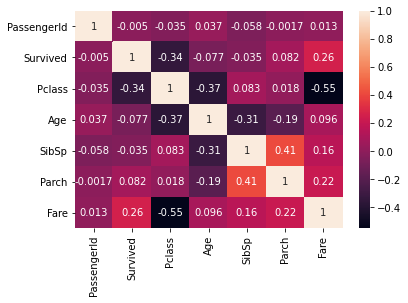